# Getting emperical/sample error estimates from LIGO parameter estimates in both O3a and O3b

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

sns.set_context("notebook")
sns.set_palette("colorblind")
import matplotlib
matplotlib.rcParams['font.family'] = 'serif' # so these plots can go into thesis
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'


%matplotlib inline

In [2]:
O3a_samples = glob('new_GWTC21/*mixed_cosmo.h5')
O3b_samples = glob('O3b-samples/*mixed_cosmo.h5')

print(len(O3a_samples))
print(len(O3b_samples))
O3ab_samples = O3a_samples + O3b_samples

46
36


## Let's start with just O3a:

(0.0, 400.0)

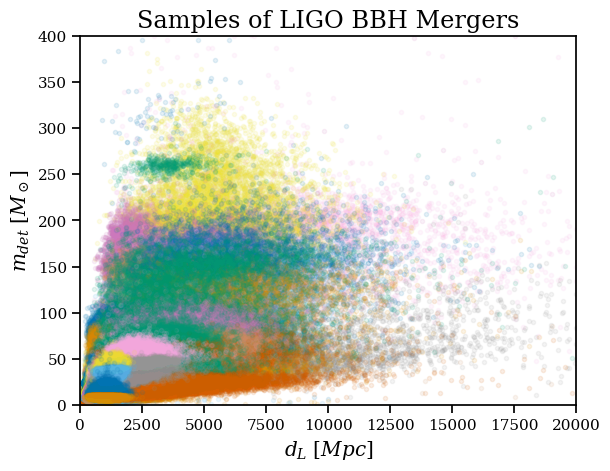

In [4]:
cols = ['mass_1', 'mass_2', 'luminosity_distance']
for f in O3ab_samples:
    with h5py.File(f, 'r') as hf:
        try: #mergers with NS don't have correct model
            posterior = np.array(hf['C01:Mixed/posterior_samples'])
            plt.scatter(posterior['luminosity_distance'], posterior['mass_1'], alpha=0.1, marker='.')
            plt.scatter(posterior['luminosity_distance'], posterior['mass_2'], alpha=0.1, marker='.')
        except:
            continue
plt.title("Samples of LIGO BBH Mergers", size='x-large')
plt.xlabel(r"$d_L\ [Mpc]$", size='large')
plt.ylabel(r"$m_{det}\ [M_\odot]$", size='large')
plt.xlim(0, 20000)
plt.ylim(0, 400)

Well that's a bit unexpected. It seems that the luminosity distance is actually much more poorly constrained than $m_1$ for most of these events...

Text(0, 0.5, '$m_{det}\\ [M_\\odot]$')

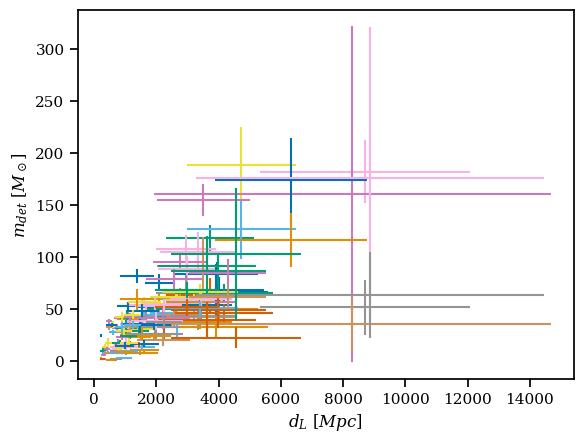

In [22]:
for f in O3ab_samples:
    with h5py.File(f, 'r') as hf:
        try:
            posterior = np.array(hf['C01:Mixed/posterior_samples'])
            m_err = np.std(posterior['mass_1'])
            m_mean = np.mean(posterior['mass_1'])
            m_err2 = np.std(posterior['mass_2'])
            m_mean2 = np.mean(posterior['mass_2'])

            dL_err = np.std(posterior['luminosity_distance'])
            dL_mean = np.mean(posterior['luminosity_distance'])
            plt.errorbar(dL_mean, m_mean, xerr=dL_err, yerr=m_err)
            plt.errorbar(dL_mean, m_mean2, xerr=dL_err, yerr=m_err2)
        except:
            continue

plt.xlabel(r"$d_L\ [Mpc]$")
plt.ylabel(r"$m_{det}\ [M_\odot]$")

<ErrorbarContainer object of 3 artists>

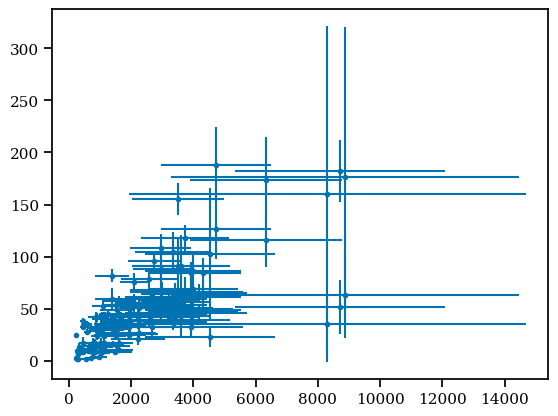

In [23]:
m_errs = []
dL_errs = []
m_means = []
dL_means = []

for f in O3ab_samples:
    with h5py.File(f, 'r') as hf:
        try:
            posterior = np.array(hf['C01:Mixed/posterior_samples'])
            m_errs.append(np.std(posterior['mass_1']))
            m_means.append(np.mean(posterior['mass_1']))
            m_errs.append(np.std(posterior['mass_2']))
            m_means.append(np.mean(posterior['mass_2']))

            dL_errs.append(np.std(posterior['luminosity_distance']))
            dL_means.append(np.mean(posterior['luminosity_distance']))
            dL_errs.append(np.std(posterior['luminosity_distance']))
            dL_means.append(np.mean(posterior['luminosity_distance']))
        except:
            continue

# for f in O3b_samples:
#     with h5py.File(f, 'r') as hf:
#         posterior = np.array(hf['C01:Mixed/posterior_samples'])
#         m_errs.append(np.std(posterior['mass_1']))
#         m_means.append(np.mean(posterior['mass_1']))

#         dL_errs.append(np.std(posterior['luminosity_distance']))
#         dL_means.append(np.mean(posterior['luminosity_distance']))
plt.errorbar(dL_means, m_means, xerr=dL_errs, yerr=m_errs, fmt='.')

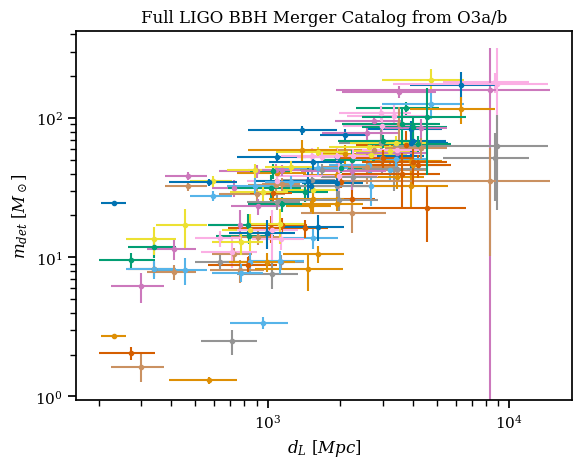

In [24]:
### Plot for thesis

for i in range(len(dL_errs)):
    plt.errorbar(dL_means[i], m_means[i], xerr=dL_errs[i], yerr=m_errs[i], fmt='.')
plt.title("Full LIGO BBH Merger Catalog from O3a/b")
plt.ylabel(r"$m_{det}\ [M_\odot]$")
plt.xlabel(r"$d_L\ [Mpc]$")
plt.xscale('log')
plt.yscale('log')

[]

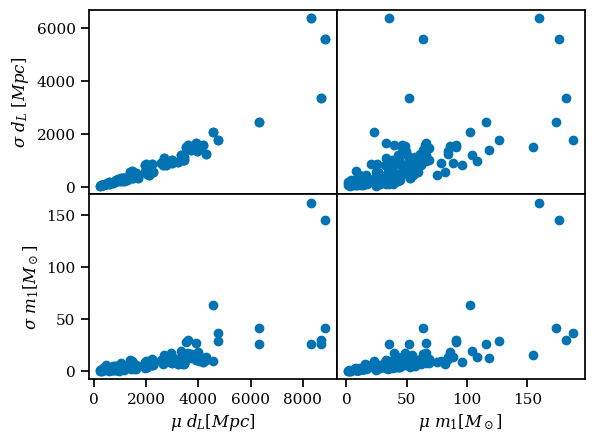

In [25]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0, wspace=0)


axs[0,0].scatter(dL_means, dL_errs)
axs[0,0].set_ylabel(r"$\sigma\ d_L\ [Mpc]$")


axs[0,1].scatter(m_means, dL_errs)
axs[0,1].set_yticks([])

axs[1,0].scatter(dL_means, m_errs)
axs[1,0].set_xlabel(r"$\mu\ d_L [Mpc]$")
axs[1,0].set_ylabel(r"$\sigma\ m_1 [M_\odot]$")


axs[1,1].scatter(m_means, m_errs)
axs[1,1].set_xlabel(r"$\mu\ m_1 [M_\odot]$")
axs[1,1].set_yticks([])

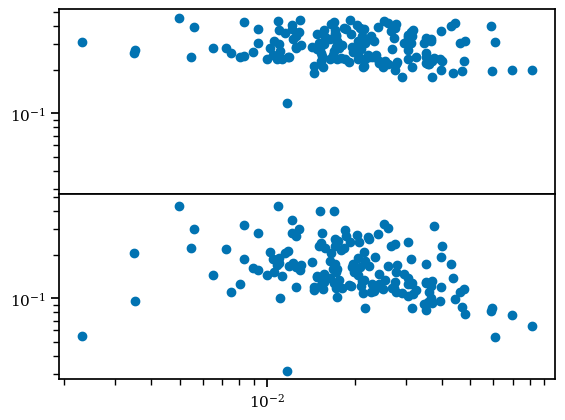

In [26]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)

m_mu = np.array(m_means)
m_sigma = np.array(m_errs)
dl_mu = np.array(dL_means)
dl_sigma = np.array(dL_errs)

m_dl = m_mu/dl_mu
sigma_dl = dl_sigma/dl_mu
sigma_m  = m_sigma/m_mu

sigma_dl_cut = sigma_dl[(sigma_dl<0.5) & (sigma_m<0.5) & (m_dl < 0.1)]
sigma_m_cut = sigma_m[(sigma_dl<0.5) & (sigma_m<0.5) & (m_dl < 0.1)]
m_dl_cut = m_dl[(sigma_dl<0.5) & (sigma_m<0.5) & (m_dl < 0.1)]

axs[0].scatter(m_dl_cut, sigma_dl_cut)
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].scatter(m_dl_cut, sigma_m_cut)
axs[1].set_xscale('log')
axs[1].set_yscale('log')

In [27]:
A_dl = np.vstack([m_dl_cut, np.ones(len(m_dl_cut))]).T
m_dl, c_dl = np.linalg.lstsq(A_dl, sigma_dl_cut, rcond=None)[0]
print(m_dl, c_dl)

A_m = np.vstack([m_dl_cut, np.ones(len(m_dl_cut))]).T
m_m, c_m = np.linalg.lstsq(A_dl, sigma_m_cut, rcond=None)[0]
print(m_m, c_m)

-0.9571125484889437 0.31689959148500413
-2.2371242328200838 0.22111701731748218


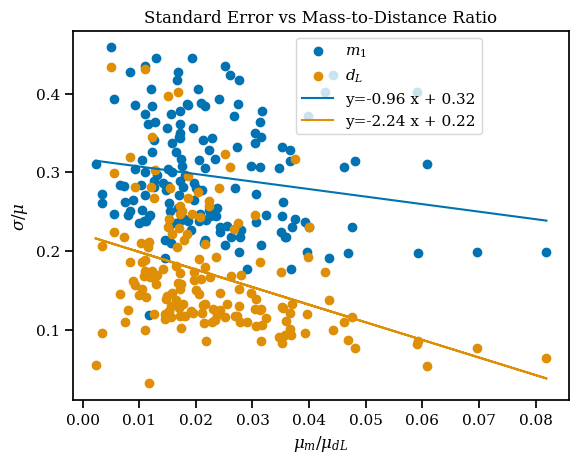

In [28]:
plt.scatter(m_dl_cut, sigma_dl_cut, label=r"$m_1$")
plt.scatter(m_dl_cut, sigma_m_cut,  label=r"$d_L$")
plt.plot(np.sort(m_dl_cut), m_dl*np.sort(m_dl_cut)+c_dl, label=f"y=%2.2f x + %2.2f"%(m_dl, c_dl))
plt.plot(m_dl_cut, m_m*m_dl_cut+c_m, label=f"y=%2.2f x + %2.2f"%(m_m, c_m))
plt.title("Standard Error vs Mass-to-Distance Ratio")
plt.xlabel(r"$\mu_m/\mu_{dL}$")
plt.ylabel(r"$\sigma/\mu$")
plt.legend(loc=(0.45, 0.72))


## Let's try logspace instead...

In [29]:
logm_dl = np.log(m_dl_cut)
log_sigma_dl = np.log(sigma_dl_cut)
log_sigma_m = np.log(sigma_m_cut)

coeffs_dl = np.polyfit(logm_dl,log_sigma_dl,deg=1)
print(coeffs_dl)
poly_dl = np.poly1d(coeffs_dl)

coeffs_m = np.polyfit(logm_dl,log_sigma_m,deg=1)
print(coeffs_m)
poly_m = np.poly1d(coeffs_m)

yfit_log_dl = lambda x: np.exp(poly_dl(np.log(x)))
yfit_log_m = lambda x: np.exp(poly_m(np.log(x)))

[-0.06718785 -1.51383122]
[-0.2387588 -2.8029856]


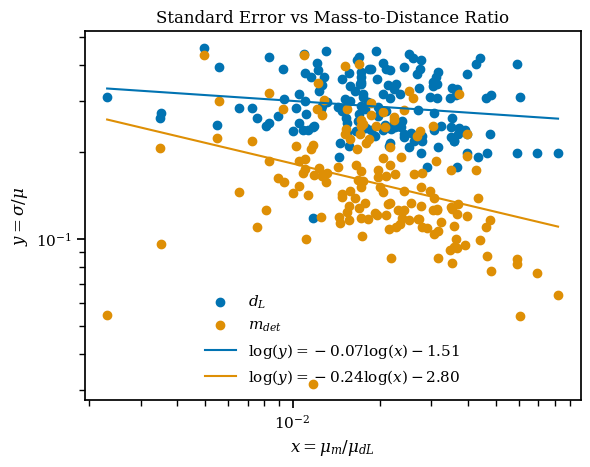

In [30]:
plt.scatter(m_dl_cut, sigma_dl_cut, label=r"$d_L$")
plt.scatter(m_dl_cut, sigma_m_cut,  label=r"$m_{det}$")
plt.plot(np.sort(m_dl_cut), yfit_log_dl(np.sort(m_dl_cut)), label=r"$\log(y)=%.2f\log(x)%.2f$"%(coeffs_dl[0], coeffs_dl[1]))
plt.plot(np.sort(m_dl_cut), yfit_log_m(np.sort(m_dl_cut)), label=r"$\log(y)=%.2f\log(x)%.2f$"%(coeffs_m[0], coeffs_m[1]))
plt.title("Standard Error vs Mass-to-Distance Ratio")
plt.xlabel(r"$x=\mu_m/\mu_{dL}$")
plt.ylabel(r"$y=\sigma/\mu$")
plt.xscale('log')
plt.yscale('log')
plt.legend(framealpha=0)